# Introduction

## Kinteics equations

The set of equations given below calculates deterministicaly the Kinteics of the formation of complexes with two homolouges.

$$\frac{d[AB]}{dt} = k_1[A][B]-k_{-1}[AB]$$

$$\frac{d[AB_i]}{dt} = k_2[A][B_i]-k_{-2}[AB_i]$$

$$\frac{d[A_iB]}{dt} = k_3[A_i][B]-k_{-3}[A_iB]$$

$$\frac{d[A_iB_i]}{dt} = k_4[A_i][B_i]-k_{-4}[A_iB_i]$$

Where $[A]$, $[B]$, $[A_i]$ and $[B_i]$ are instantanious concentrations of the respective reactants and can be caculated using the following relations with  $[A_0]$, $[B_0]$, $[A_{i0}]$ and $[B_{i0}]$ being the starting concentration of the respective reactants.

$$[A]= [A_0]-([AB]-[AB_{0}]+[AB_i]-[AB_{i0}])$$

$$[B]= [B_0]-([A_iB]-[A_iB_{0}]+[AB]-[AB_{0}])$$

$$[A_i]= [A_{i0}]-([A_iB]-[A_iB_{0}]+[A_iB_i]-[A_iB_{i0}])$$

$$[B_i]= [B_{i0}]-([AB_i]-[AB_{i0}]+[A_iB_i]-[A_iB_{i0}])$$

These equations can be solved numericaly to obtain concentrations of every component at different time points.

## At equillibrium

The set of equations given below calculates the amount of complexes at equillibrium

$$[AB] = \frac{[A][B]}{Kd_{AB}}$$

$$[AB_i] = \frac{[A][B_i]}{Kd_{AB_i}}$$

$$[A_iB] = \frac{[A_i][B]}{Kd_{A_iB}}$$

$$[A_iB_i] = \frac{[A_i][B_i]}{Kd_{A_iB_i}}$$

Where 

$$[A]= [A_0]-([AB]-[AB_{0}]+[AB_i]-[AB_{i0}])$$

$$[B]= [B_0]-([A_iB]-[A_iB_{0}]+[AB]-[AB_{0}])$$

$$[A_i]= [A_{i0}]-([A_iB]-[A_iB_{0}]+[A_iB_i]-[A_iB_{i0}])$$

$$[B_i]= [B_{i0}]-([AB_i]-[AB_{i0}]+[A_iB_i]-[A_iB_{i0}])$$

## Implementing in sympy


In [1]:
# symbolic python import

import sympy as sym
from sympy import init_printing

# def cal_complex_at_equillibrum(A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi):

#     # a,b,c,d = sym.symbols('a,b,c,d')
#     AB,ABi,AiB,AiBi = sym.symbols('AB,ABi,AiB,AiBi')

#     eqAB   = sym.Eq((A0-AB-ABi+AB0+ABi0)*(B0-AB-AiB+AB0+AiB0)/KdAB,AB)
#     eqABi  = sym.Eq((A0-AB-ABi+AB0+ABi0)*(Bi0-ABi-AiBi+ABi0+AiBi0)/KdABi,ABi)
#     eqAiB  = sym.Eq((Ai0-AiB-AiBi+AiB0+AiBi0)*(B0-AB-AiB+AB0+AiB0)/KdAiB,AiB)
#     eqAiBi = sym.Eq((Ai0-AiB-AiBi+AiB0+AiBi0)*(Bi0-ABi-AiBi+ABi0+AiBi0)/KdAiBi,AiBi)

#     # print(eqAB)
#     # print(eqABi)
#     # print(eqAiB)
#     # print(eqAiBi) 

#     return sym.solve([eqAB,eqABi,eqAiB,eqAiBi],(AB,ABi,AiB,AiBi))

def cal_complex_at_equillibrum(A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,KdAB,KdABi,KdAiB):

    # a,b,c,d = sym.symbols('a,b,c,d')
    AB,ABi,AiB = sym.symbols('AB,ABi,AiB')

    eqAB   = sym.Eq((A0-AB-ABi+AB0+ABi0)*(B0-AB-AiB+AB0+AiB0)/KdAB,AB)
    eqABi  = sym.Eq((A0-AB-ABi+AB0+ABi0)*(Bi0-ABi+ABi0)/KdABi,ABi)
    eqAiB  = sym.Eq((Ai0-AiB+AiB0)*(B0-AB-AiB+AB0+AiB0)/KdAiB,AiB)
    # eqAiBi = sym.Eq((Ai0-AiB+AiB0)*(Bi0-ABi+ABi0)/KdAiBi,AiBi)

    # print(eqAB)
    # print(eqABi)
    # print(eqAiB)
    # print(eqAiBi) 

    return sym.solve([eqAB,eqABi,eqAiB],(AB,ABi,AiB),manual=True)

def check_for_img(i,img_cutoff):
    # check if a solution has a significant imiginary part based on a cutoff
    for x in i: #if any of I greater than cutoff
        if x > img_cutoff:
            return True
    return False

def stoichiometry(X,complexes,stoichio_diff_cutoff): 
    # checks if stotiometry adds up using equillibrium and initial condition for 1 monomer
    d = False
    # print((X - sum(complexes)))
    if (X - sum(complexes)) >= stoichio_diff_cutoff:        
        d = True
    return d

def value_possible(r,init_concentrations,sto_co):
    # checks stotiometry for all monomers
    AB,ABi,AiB = r
    A0,B0,Ai0,Bi0,AB0,ABi0,AiB0 = init_concentrations

    # check stochiometry for A0 and B0 
    if stoichiometry(A0,[AB,ABi,AB0,ABi0],sto_co) and stoichiometry(B0,[AB,AiB,AB0,AiB0],sto_co) and stoichiometry(Ai0,[AiB,AiB0],sto_co) and stoichiometry(Bi0,[ABi,ABi0],sto_co):
        return True
    return False

def split_real_and_img(Sols):
    # finction to split the solution into real and imaginary parts
    real,img = [],[]
    for sol in Sols:
        temp_r,temp_img = [],[]
        for val in sol:
            temp_r.append(sym.re(val))
            temp_img.append(sym.im(val))
        real.append(temp_r)
        img.append(temp_img)
    return real,img

def pick_correct_solution(Sols,init_concentrations,img_cutoff=1e-15,stoichio_diff_cutoff=0.001):
    # picks solutions that satisfy both real and stoichiometry 
    real,img = split_real_and_img(Sols)
    # for each solution check if imaginary part is a large value. This is reqired because there are residual imaginary components due to floating point errors
    picked_solns = []
    for k in range(len(real)):
        r,i = real[k],img[k]
        if value_possible(r,init_concentrations,stoichio_diff_cutoff) and not check_for_img(i,img_cutoff):
            picked_solns.append(r)
    if len(picked_solns) > 1:
        print('Pick failed ',len(picked_solns),'solutions remaining!')
    return picked_solns

def pick_real_solution(Sols,init_concentrations,img_cutoff=1e-15):
    # pick solutionthat satisfy real
    real,img = split_real_and_img(Sols)
    # for each solution check if imaginary part is a large value. This is reqired because there are residual imaginary components due to floating point errors
    picked_solns = []
    for k in range(len(real)):
        r,i = real[k],img[k]
        if not check_for_img(i,img_cutoff):
            picked_solns.append(r)
    # if len(picked_solns) > 1:
    #     print('Pick failed ',len(picked_solns),'solutions remaining!')
    return picked_solns


# Analysis of dependence of ABeq on starting parameters

In [2]:
def get_default():
    A0,B0 = 1,1
    Ai0,Bi0 = 1,1
    AB0,ABi0,AiB0,AiBi0 = 0,0,0,0
    KdAB  = 1e-6
    KdABi = 1e-1
    KdAiB = 1e-1
    KdAiBi = float('inf')
    return A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi

file_dump = '../file_dump/'
image_dump = '../image_dump/'

In [3]:
import pickle
from tqdm import tqdm
def calc_dependence(iter_range,assignment_function,pickle_file_name):
    '''
    Function that takes in an iter_range and a function that swapes the iterable for a parameter and calculates complexes at equillibrium
    '''
    iter_list = []
    AB_list = []
    ABi_list = []
    AiB_list = []
    AiBi_list = []

    iter_list_real_soln = []
    AB_list_real_soln = []
    ABi_list_real_soln = []
    AiB_list_real_soln = []
    AiBi_list_real_soln = []

    for iter in tqdm(iter_range):    
        # print(iter)
        # swap iter with parameter as per assignment function
        A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi = assignment_function(iter)
        # print(A0)
        # calculate complex at equillibrm by analytical method using sympy
        Sols = cal_complex_at_equillibrum(A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,KdAB,KdABi,KdAiB)
        # print(Sols)
        # pick all real solutions
        init_concentrations = [A0,B0,Ai0,Bi0,AB0,ABi0,AiB0]
        r_sols = pick_real_solution(Sols,init_concentrations,img_cutoff=1e-15)
        for sol in r_sols:
            AB,ABi,AiB = sol
            iter_list_real_soln.append(iter)
            AB_list_real_soln.append(AB)
            ABi_list_real_soln.append(ABi)
            AiB_list_real_soln.append(AiB)
            # AiBi_list_real_soln.append(AiBi)
        
        # pick all real and possible solutions
        # based on stotiometric difference. checks if final stotiometry is possible based on initial conditions
        r_sols = pick_correct_solution(Sols,init_concentrations,img_cutoff=1e-15,stoichio_diff_cutoff=0)
        for sol in r_sols:
            AB,ABi,AiB = sol
            iter_list.append(iter)
            AB_list.append(AB)
            ABi_list.append(ABi)
            AiB_list.append(AiB)
            # AiBi_list.append(AiBi) 
    
    # Make list into dicts 
    picked = {'iter':iter_list,'AB':AB_list,'ABi':ABi_list,'AiB':AiB_list,'AiBi':AiBi_list}
    rel_solns = {'iter':iter_list_real_soln,'AB':AB_list_real_soln,'ABi':ABi_list_real_soln,'AiB':AiB_list_real_soln,'AiBi':AiBi_list_real_soln}
    # save dict as a pickle file
    with open(pickle_file_name,'wb') as inf:
        pickle.dump((rel_solns,picked),inf)

def get_pickled_values(pickle_file_name):
    # reads pickel and gives back the dicts
    with open(pickle_file_name,'rb') as inf:
        rel_solns,picked = pickle.load(inf)

    return rel_solns,picked

In [4]:
def unified_plot_format():
    import matplotlib.pyplot as plt
    # h = 5
    # w =2.5      
    plt.figure(figsize=(4,2))
    return plt

## ABeq vs A0

In [5]:
# creating imputs for the functions
def assignment_function_A0(iter):
    # assigns A0 as iter
    A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi = get_default()
    return iter,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi

iter_range_A0 = [x/10 for x in range(0,40)]
pkl_file_A0 = file_dump+'ABeq_vs_A0_2_inh.pkl'

In [6]:
# checking if pickle file exist if so the read results from there else compute and write file then read it
try:
    rel_solns,picked = get_pickled_values(pkl_file_A0)

except:
    calc_dependence(iter_range_A0,assignment_function_A0,pkl_file_A0)
    rel_solns,picked = get_pickled_values(pkl_file_A0)

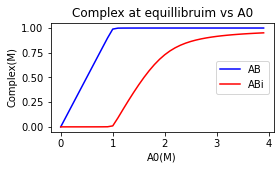

In [8]:
# plotting 
plt = unified_plot_format()

title = 'Complex at equillibruim vs A0'
plt.title(title)
plt.xlabel('A0(M)')
plt.ylabel('Complex(M)')
# plt.xscale('log')
plt.plot(picked['iter'],picked['AB'],label='AB',c='Blue')
plt.plot(picked['iter'],picked['ABi'],label='ABi',c='Red')
plt.legend(loc=5)
plt.savefig(image_dump+'ABeq_vs_A0_2_inh.png',dpi =600,bbox_inches='tight') 

## ABeq vs B0

In [9]:
# creating imputs for the functions
def assignment_function_B0(iter):
    # assigns B0 as iter
    A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi = get_default()
    return A0,iter,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi

iter_range_B0 = [x/10 for x in range(0,20)]
pkl_file_B0 = file_dump+'ABeq_vs_B0_2_inh.pkl'

In [10]:
# checking if pickle file exist if so the read results from there else compute and write file then read it
try:
    rel_solns,picked = get_pickled_values(pkl_file_B0)

except:
    calc_dependence(iter_range_B0,assignment_function_B0,pkl_file_B0)
    rel_solns,picked = get_pickled_values(pkl_file_B0)

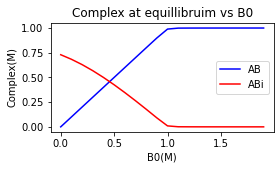

In [11]:
# plotting 
plt = unified_plot_format()

title = 'Complex at equillibruim vs B0'
plt.title(title)
plt.xlabel('B0(M)')
plt.ylabel('Complex(M)')
# plt.xscale('log')
plt.plot(picked['iter'],picked['AB'],label='AB',c='Blue')
plt.plot(picked['iter'],picked['ABi'],label='ABi',c='Red')
plt.legend(loc=5)
plt.savefig(image_dump+'ABeq_vs_B0_2_inh.png',dpi =600,bbox_inches='tight') 

## ABeq vs Bi0

In [7]:
# creating imputs for the functions
def assignment_function_Bi0(iter):
    # assigns B0 as iter
    A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi = get_default()
    return A0,B0,iter,iter,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi

iter_range_Bi0 = [x/1 for x in range(0,50,)]
pkl_file_Bi0 = file_dump+'ABeq_vs_Bi0_2_inh.pkl'

In [8]:
# checking if pickle file exist if so the read results from there else compute and write file then read it
try:
    rel_solns,picked = get_pickled_values(pkl_file_Bi0)

except:
    calc_dependence(iter_range_Bi0,assignment_function_Bi0,pkl_file_Bi0)
    rel_solns,picked = get_pickled_values(pkl_file_Bi0)

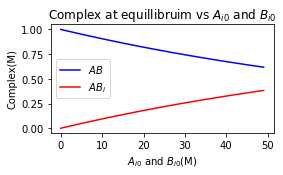

In [14]:
# plotting 
plt = unified_plot_format()

title = 'Complex at equillibruim vs $A_{i0}$ and $B_{i0}$'
plt.title(title)
plt.xlabel('$A_{i0}$ and $B_{i0}$(M)')
plt.ylabel('Complex(M)')
# plt.xscale('log')
plt.plot(picked['iter'],picked['AB'],label='$AB$',c='Blue')
plt.plot(picked['iter'],picked['ABi'],label='$AB_i$',c='Red')
plt.legend(loc=6)
plt.savefig(image_dump+'ABeq_vs_Bi0_2_inh.png',dpi =600,bbox_inches='tight') 

## ABeq vs Kd

In [15]:
# creating imputs for the functions
def assignment_function_Kd(iter):
    # assigns B0 as iter
    A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi = get_default()
    return A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,iter,KdABi,KdAiB,KdAiBi

iter_range_Kd = [10**(x/10) for x in range(-90,0,2)]
pkl_file_Kd = file_dump+'ABeq_vs_Kd_2_inh.pkl'

In [16]:
# checking if pickle file exist if so the read results from there else compute and write file then read it
try:
    rel_solns,picked = get_pickled_values(pkl_file_Kd)

except:
    calc_dependence(iter_range_Kd,assignment_function_Kd,pkl_file_Kd)
    rel_solns,picked = get_pickled_values(pkl_file_Kd)

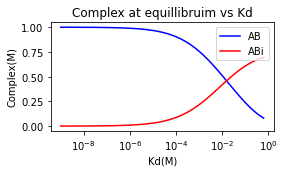

In [17]:
# plotting 
plt = unified_plot_format()

title = 'Complex at equillibruim vs Kd'
plt.title(title)
plt.xlabel('Kd(M)')
plt.ylabel('Complex(M)')
plt.xscale('log')
plt.plot(picked['iter'],picked['AB'],label='AB',c='Blue')
plt.plot(picked['iter'],picked['ABi'],label='ABi',c='Red')
plt.legend(loc=1)
plt.savefig(image_dump+'ABeq_vs_Kd_2_inh.png',dpi =600,bbox_inches='tight') 

## ABeq vs Kdi

In [18]:
# creating imputs for the functions
def assignment_function_Kdi(iter):
    # assigns B0 as iter
    A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,KdABi,KdAiB,KdAiBi = get_default()
    return A0,B0,Ai0,Bi0,AB0,ABi0,AiB0,AiBi0,KdAB,iter,iter,KdAiBi

iter_range_Kdi = [10**(x/10) for x in range(-90,0,2)]
pkl_file_Kdi = file_dump+'ABeq_vs_Kdi_2_inh.pkl'

In [19]:
# checking if pickle file exist if so the read results from there else compute and write file then read it
try:
    rel_solns,picked = get_pickled_values(pkl_file_Kdi)

except:
    calc_dependence(iter_range_Kdi,assignment_function_Kdi,pkl_file_Kdi)
    rel_solns,picked = get_pickled_values(pkl_file_Kdi)

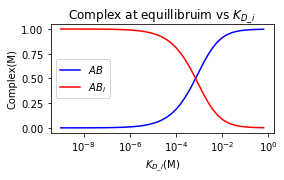

In [21]:
# plotting 
plt = unified_plot_format()

title = 'Complex at equillibruim vs $K_{D\_i}$'
plt.title(title)
plt.xlabel('$K_{D\_i}$(M)')
plt.ylabel('Complex(M)')
plt.xscale('log')
plt.plot(picked['iter'],picked['AB'],label='$AB$',c='Blue')
plt.plot(picked['iter'],picked['ABi'],label='$AB_i$',c='Red')
plt.legend(loc=6)
plt.savefig(image_dump+'ABeq_vs_Kdi_2_inh.png',dpi =600,bbox_inches='tight') 